In [15]:
# dataframes 
import numpy as np
# import pandas as pd
import polars as pd

# cargar archivos
import uproot
from tqdm import tqdm # sirve para ver la linea de carga al cargar los archivos
import sys
import yaml

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# funcion de xgboost que clasifica
from xgboost import XGBClassifier

# graficar el arbol de desiciones del modelo, rcparams es para que se vea HD
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# medir que tan bueno es el modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# encontrar mejor modelo (validacion)
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score

# ver la prueba de ks
from scipy.stats import kstest

# funciones creadas
from lectura import *
from formulas import *
from cortes import *
from graficar import *
from machine_learning import *
from metricas import *

# para recargar los modulos mientras los voy debugeando
%load_ext autoreload
%autoreload 2

# tensorflow
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Num GPUs Available:  1


In [10]:
########################################################
########### LECTURA DATOS PREVIOS YAML #################
########################################################

# cargar archivo yaml
path = "/home/tomilee/Desktop/Universidad/dark_photons/proyecto_investigacion/codigo/"
data_yaml = read_data_yaml('parametros_ml.yaml')      #Parámetros del calo

# de data_yaml obtenemos los nombres de los datasets
vbf_data = data_yaml['VBF'].values() #esto devuelve solo los valores de cada variable.
ggf_data = data_yaml['ggF'].values() #esto devuelve solo los valores de cada variable.

# de data_yaml obtenemos los nombres de las variables
variables = data_yaml['recover_branches']
# de data_yaml obtenemos las escalas de las variables
scales = data_yaml['scale_variable']

# de data_yaml obtenemos los nombres de los cortes y los valores de los cortes menores y mayores
cuts = data_yaml['cuts']

In [11]:
########################################################
############# LECTURA DATOS ROOT FILES #################
########################################################
df_all = read_datasets(vbf_data, ggf_data, variables, scales, path)
df_all

 12%|█▎        | 1/8 [00:00<00:03,  2.31it/s]

samples/VBF/frvz_vbf_500757


 25%|██▌       | 2/8 [00:00<00:02,  2.17it/s]

samples/VBF/frvz_vbf_500758


 38%|███▊      | 3/8 [00:01<00:02,  2.16it/s]

samples/VBF/frvz_vbf_500759


 50%|█████     | 4/8 [00:01<00:01,  2.29it/s]

samples/VBF/frvz_vbf_500760


 62%|██████▎   | 5/8 [00:02<00:01,  2.26it/s]

samples/VBF/frvz_vbf_500761


 75%|███████▌  | 6/8 [00:02<00:00,  2.23it/s]

samples/VBF/frvz_vbf_500762


 88%|████████▊ | 7/8 [00:03<00:00,  2.26it/s]

samples/VBF/frvz_vbf_500763


100%|██████████| 8/8 [00:03<00:00,  2.26it/s]


samples/VBF/frvz_vbf_500764


100%|██████████| 9/9 [00:15<00:00,  1.70s/it]


njet30          mjj      detajj  \
origin df_name                                                        
VBF    samples/VBF/frvz_vbf_500757       2  1316.194214    5.130603   
       samples/VBF/frvz_vbf_500757       7  2287.880371    7.156201   
       samples/VBF/frvz_vbf_500757       2  1568.506470    6.255918   
       samples/VBF/frvz_vbf_500757       4   471.740875    1.960242   
       samples/VBF/frvz_vbf_500757       8  1150.059692    4.557185   
...                                    ...          ...         ...   
ggF    samples/ggF/frvz_ggf_508893       1    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       3   240.689178    1.942230   
       samples/ggF/frvz_ggf_508893       2   143.422470    2.548514   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   

                                        dphijj         MET  scale1fb  \
origin df_name                                                         
VBF    samples/VBF/frvz_vbf_500757    1.032967  177.043106  0.000486   
       samples/VBF/frvz_vbf_500757   -2.580441  101.195091  0.000502   
       samples/VBF/frvz_vbf_500757   -1.375577  130.909744  0.000429   
       samples/VBF/frvz_vbf_500757    2.980181  491.291687  0.000531   
       samples/VBF/frvz_vbf_500757    2.197970  115.439743  0.000014   
...                                        ...         ...       ...   
ggF    samples/ggF/frvz_ggf_508893 -999.000000   40.554482  0.028479   
       samples/ggF/frvz_ggf_508893    0.768057   76.802452  0.029882   
       samples/ggF/frvz_ggf_508893    2.000947   26.644657  0.029517   
       samples/ggF/frvz_ggf_508893 -999.000000   10.709071  0.029929   
       samples/ggF/frvz_ggf_508893 -999.000000   10.808948  0.030318   

                                      intLumi        jet1_pt    jet1_eta  \
origin df_name                                                             
VBF    samples/VBF/frvz_vbf_500757  44.299999  104969.406250   -3.187121   
       samples/VBF/frvz_vbf_500757  44.299999   72039.820312    3.637084   
       samples/VBF/frvz_vbf_500757  44.299999  120273.304688   -2.382490   
       samples/VBF/frvz_vbf_500757  44.299999  178915.984375    1.259632   
       samples/VBF/frvz_vbf_500757  44.299999  189834.156250   -2.913896   
...                                       ...            ...         ...   
ggF    samples/ggF/frvz_ggf_508893  58.450001   33552.746094    0.995871   
       samples/ggF/frvz_ggf_508893  58.450001  125251.289062   -2.288580   
       samples/ggF/frvz_ggf_508893  58.450001   40318.128906   -3.305732   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   

                                      jet1_phi        jet1_e        jet2_pt  \
origin df_name                                                                
VBF    samples/VBF/frvz_vbf_500757   -0.087903  1.273288e+06   98169.875000   
       samples/VBF/frvz_vbf_500757    0.712928  1.369027e+06   56599.265625   
       samples/VBF/frvz_vbf_500757   -2.404870  6.569827e+05   39280.699219   
       samples/VBF/frvz_vbf_500757   -2.167910  3.411552e+05  133583.312500   
       samples/VBF/frvz_vbf_500757   -1.059290  1.754382e+06   72083.078125   
...                                        ...           ...            ...   
ggF    samples/ggF/frvz_ggf_508893   -2.499207  5.242589e+04    -999.000000   
       samples/ggF/frvz_ggf_508893    1.335905  6.239932e+05   79405.820312   
       samples/ggF/frvz_ggf_508893    0.382778  5.504859e+05   36411.175781   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   

                                      jet2_eta    jet2_phi        jet2_e  
origin df_name                                                            
VBF    s

In [12]:
#################################################################
#################### PROCESAMIENTO DE DATOS #####################
#################################################################

# hago los cortes definitivos
df_all_cut = do_cuts(df_all, cuts, scales)

# modifico df_all para aplicar ml
df_ml = df_all_cut
df_ml = df_ml.droplevel('df_name')
df_ml = df_ml.drop(['njet30', 'scale1fb', 'intLumi'], axis=1) # omito njet30, intlumi y scale1f
df_ml = df_ml.reset_index(level='origin')
df_ml = pd.get_dummies(df_ml, columns=['origin'], dtype=int)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml.drop(['origin_VBF', 'origin_ggF'], axis=1) 
df_y = df_ml[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3)#, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5)

df_ml

Numero eventos antes: 4628576
Corte: njet30 entre [1, inf]
Numero eventos despues: 2013265 

Numero eventos antes: 2013265
Corte: mjj entre [900000, inf]
Numero eventos despues: 401061 



,mjj,detajj,dphijj,MET,jet1_pt,jet1_eta,jet1_phi,jet1_e,jet2_pt,jet2_eta,jet2_phi,jet2_e,origin_VBF,origin_ggF
0,1316.194214,5.130603,1.032967,177.043106,104969.406250,-3.187121,-0.087903,1.273288e+06,98169.875000,1.943482,-1.120870,3.498132e+05,1,0
1,2287.880371,7.156201,-2.580441,101.195091,72039.820312,3.637084,0.712928,1.369027e+06,56599.265625,-3.519117,-2.989815,9.561007e+05,1,0
2,1568.506470,6.255918,-1.375577,130.909744,120273.304688,-2.382490,-2.404870,6.569827e+05,39280.699219,3.873428,-1.029293,9.452691e+05,1,0
3,1150.059692,4.557185,2.197970,115.439743,189834.156250,-2.913896,-1.059290,1.754382e+06,72083.078125,1.643289,3.025926,1.938794e+05,1,0
4,1959.747314,5.296212,-0.007301,173.871338,185329.890625,-1.776462,-0.692636,5.636762e+05,104825.007812,3.519750,-0.685335,1.771840e+06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400510,1375.437012,5.910862,-1.310179,206.011978,153233.453125,-2.751994,-2.272271,1.205820e+06,33497.703125,3.158869,-0.962092,3.950761e+05,0,1
400511,1298.385620,5.570216,1.490798,204.691193,94238.859375,2.544895,1.564830,6.042351e+05,68172.960938,-3.025321,0.074032,7.038728e+05,0,1
400512,1024.361084,6.604571,-2.378259,30.073345,43778.152344,3.034697,2.696079,4.563027e+05,32387.500000,-3.569874,-1.208847,5.755651e+05,0,1
400513,1099.484253,6.322570,-0.535331,151.870178,51457.390625,-3.545921,1.085866,8.928492e+05,42295.820312,2.776649,1.621197,3.411398e+05,0,1


In [13]:
df_ml['origin_ggF']
df_ml2 = df_ml.drop(['jet2_eta', 'jet1_eta', 'jet2_phi', 'MET', 'origin_ggF', 'dphijj', 'jet1_phi'], axis=1)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml2.drop(['origin_VBF'], axis=1) 
df_y = df_ml2[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3, random_state=228)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5, random_state=228)
X_test, y_test = X_metrico, y_metrico 

df_ml2

,mjj,detajj,jet1_pt,jet1_e,jet2_pt,jet2_e,origin_VBF
0,1316.194214,5.130603,104969.406250,1.273288e+06,98169.875000,3.498132e+05,1
1,2287.880371,7.156201,72039.820312,1.369027e+06,56599.265625,9.561007e+05,1
2,1568.506470,6.255918,120273.304688,6.569827e+05,39280.699219,9.452691e+05,1
3,1150.059692,4.557185,189834.156250,1.754382e+06,72083.078125,1.938794e+05,1
4,1959.747314,5.296212,185329.890625,5.636762e+05,104825.007812,1.771840e+06,1
...,...,...,...,...,...,...,...
400510,1375.437012,5.910862,153233.453125,1.205820e+06,33497.703125,3.950761e+05,0
400511,1298.385620,5.570216,94238.859375,6.042351e+05,68172.960938,7.038728e+05,0
400512,1024.361084,6.604571,43778.152344,4.563027e+05,32387.500000,5.755651e+05,0
400513,1099.484253,6.322570,51457.390625,8.928492e+05,42295.820312,3.411398e+05,0


# DEEP LEARNING

In [19]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),  # 4 características en el conjunto de datos Iris
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con función de activación sigmoide para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

print(y_train.shape)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=40, batch_size=16, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

(280360, 1)
Epoch 1/20
15771/15771 [==============================] - 30s 2ms/step - loss: 0.2729 - accuracy: 0.9103 - val_loss: 0.2530 - val_accuracy: 0.9177
Epoch 2/20
15771/15771 [==============================] - 32s 2ms/step - loss: 0.2563 - accuracy: 0.9161 - val_loss: 0.2513 - val_accuracy: 0.9187
Epoch 3/20
15771/15771 [==============================] - 32s 2ms/step - loss: 0.2553 - accuracy: 0.9163 - val_loss: 0.2517 - val_accuracy: 0.9185
Epoch 4/20
15771/15771 [==============================] - 26s 2ms/step - loss: 0.2551 - accuracy: 0.9165 - val_loss: 0.2513 - val_accuracy: 0.9185
Epoch 5/20
15771/15771 [==============================] - 29s 2ms/step - loss: 0.2549 - accuracy: 0.9163 - val_loss: 0.2510 - val_accuracy: 0.9191
Epoch 6/20
15771/15771 [==============================] - 29s 2ms/step - loss: 0.2549 - accuracy: 0.9163 - val_loss: 0.2506 - val_accuracy: 0.9187
Epoch 7/20
15771/15771 [==============================] - 30s 2ms/step - loss: 0.2548 - accuracy: 0.9163 -

In [29]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),  # 4 características en el conjunto de datos Iris
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con función de activación sigmoide para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

print(y_train.shape)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

(280360, 1)
Epoch 1/5
15771/15771 [==============================] - 38s 2ms/step - loss: 0.2619 - accuracy: 0.9136 - val_loss: 0.2519 - val_accuracy: 0.9178
Epoch 2/5
15771/15771 [==============================] - 38s 2ms/step - loss: 0.2579 - accuracy: 0.9150 - val_loss: 0.2548 - val_accuracy: 0.9154
Epoch 3/5
15771/15771 [==============================] - 34s 2ms/step - loss: 0.2574 - accuracy: 0.9148 - val_loss: 0.2516 - val_accuracy: 0.9183
Epoch 4/5
15771/15771 [==============================] - 35s 2ms/step - loss: 0.2572 - accuracy: 0.9149 - val_loss: 0.2534 - val_accuracy: 0.9164
Epoch 5/5
3755/3755 [==============================] - 4s 1ms/step - loss: 0.2521 - accuracy: 0.9171
Loss: 0.25208520889282227, Accuracy: 0.9170737862586975


In [30]:
precision(model, X_test, y_test)

3755/3755 [==============================] - 3s 894us/step
Precisión del modelo: 91.71%


In [23]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.5
matriz = confusion(y_test, y_pred)
pd.DataFrame(matriz)

3755/3755 [==============================] - 3s 798us/step


,0,1
0,107131,921
1,9054,3049


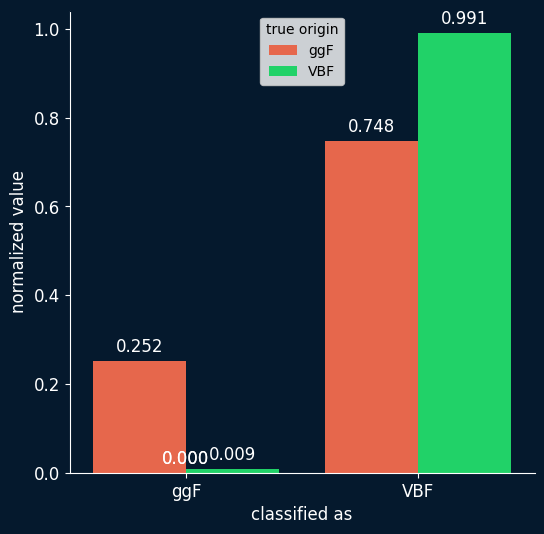

In [24]:
plot_confusion_barras(matriz)

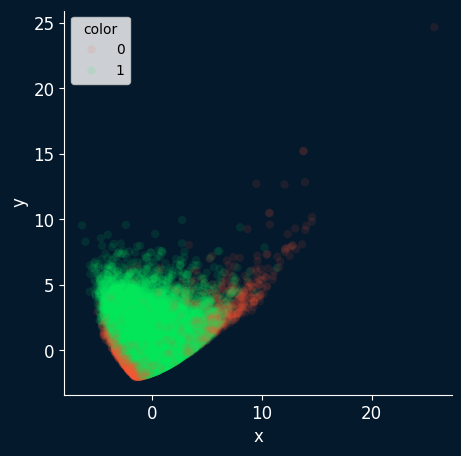

In [25]:
plot_pca_2D(model, 
            df_X.sample(100000, random_state=123), 
            df_y.sample(100000, random_state=123))

In [32]:
y_pred_all = model.predict(X_test)>0.5

3755/3755 [==============================] - 4s 934us/step


In [33]:
y_pred = pd.DataFrame(y_pred_all).sample(100000, random_state=123)

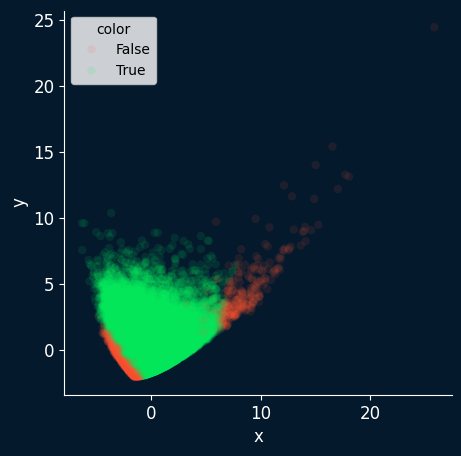

In [34]:
plot_pca_2D(model, 
            pd.DataFrame(X_test.reshape((X_test.shape[0], 6))).sample(100000, random_state=123),
            y_pred)